In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tidal_1d import tidal1d
from tidal_maq import tidalmaq

### Example 1
Single aquifer covered by a leaky layer.
Comparison of one layer solution and multi-layer solution where the leaky layer is simulated with multiple aquifer layers.

In [2]:
k1 = 0.005 
k2 = 50.0
H1 = 20.0
H2 = 20.0
Sll = 5e-5
Ss = 5e-5
beta = 0.5
gamma = 1
tau = 0.5 # days

#1D
Taq = k2 * H2
Saq = Ss * H2
c = H1 / k1
ml1d = tidal1d(Taq, Taq, Ss * H2, Ss * H2, c, c, Sll * H1, Sll * H1, beta, gamma=gamma, tau=tau, hs=1)
# zero leaky layer storage
ml1d0 = tidal1d(Taq, Taq, Ss * H2, Ss * H2, c, c, 0, 0, beta, gamma=gamma, tau=tau, hs=1)

#MAQ, leaky layer simulated with 1 aquifer layer
N = 2
kmaq = np.array([k1, k2])
Hmaq = np.array([H1, H2])
Smaq = np.array([Sll * H1, Ss * H2])
zmaq = np.array([0, -H1, -H1 - H2])  # all layers equal thickness
Tmaq = kmaq * Hmaq
cmaq = np.array([H1 / (2 * k1), H1 / (2 * k1)])  # vertical resistance of aquifer not included
betamaq = np.array([gamma, beta])
gammamaq = gamma * np.ones(N)
mlmaq = tidalmaq(Tmaq, Tmaq, Smaq, Smaq, cmaq, cmaq, 0, 0, betamaq, gammamaq, tau, hs=1)

#MAQ, leaky layer simulated with 10 aquifer layers
Nll = 10
kmaq = np.array(Nll * [k1] + [k2])
Hmaq = np.array(Nll * [H1 / Nll] + [H2])
Smaq = np.hstack((Hmaq[:-1] * Sll, Ss * H2))
Tmaq = kmaq * Hmaq
cmaq = np.hstack((H1 / (2 * k1 * Nll), H1 / (k1 * Nll) * np.ones(Nll - 1), H1 / (2 * k1 * Nll)))  # vertical resistance of aquifer not included
betamaq = np.hstack((gamma * np.ones(Nll), beta)) 
gammamaq = gamma * np.ones(Nll + 1)
mlmaq2 = tidalmaq(Tmaq, Tmaq, Smaq, Smaq, cmaq, cmaq, 0, 0, betamaq, gammamaq, tau, hs=1)

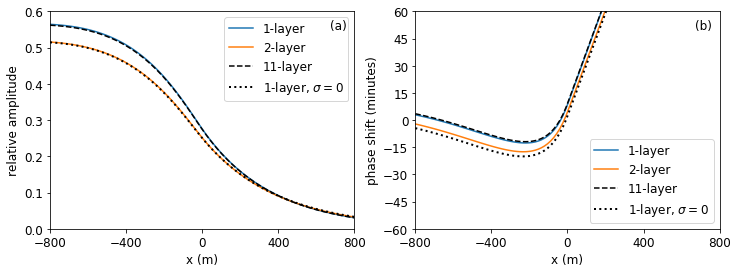

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
x = np.linspace(-800, 800, 100)
a1 = ml1d.amp(x)
a1_0 = ml1d0.amp(x)
a2 = mlmaq.amp(x)[1]
a3 = mlmaq2.amp(x)[Nll]
plt.plot(x, a1, label='1-layer')
plt.plot(x, a2, label='2-layer')
plt.plot(x, a3, 'k--', label='11-layer')
plt.plot(x, a1_0, 'k:', lw=2, label='1-layer, $\sigma=0$')
plt.legend(fontsize=12)
plt.xlim(-800, 800)
plt.ylim(0, 0.6)
plt.yticks(fontsize=12)
plt.xticks(np.arange(-800, 801, 400), fontsize=12)
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('relative amplitude', fontsize=12)
plt.text(0.92, 0.92, '(a)', transform=plt.gca().transAxes, fontsize=12, zorder=100)
#
plt.subplot(122)
x = np.linspace(-800, 800, 100)
f1 = ml1d.phase(x) * 24 * 60
f1_0 = ml1d0.phase(x) * 24 * 60
f2 = mlmaq.phase(x)[1] * 24 * 60
f3 = mlmaq2.phase(x)[Nll] * 24 * 60
plt.plot(x, f1, label='1-layer')
plt.plot(x, f2, label='2-layer')
plt.plot(x, f3, 'k--', label='11-layer')
plt.plot(x, f1_0, 'k:', lw=2, label='1-layer, $\sigma=0$')
plt.legend(fontsize=12, loc='lower right')
plt.xlim(-800, 800)
plt.ylim(-60, 60)
plt.yticks(np.arange(-60, 61, 15), fontsize=12)
plt.xticks(np.arange(-800, 801, 400), fontsize=12)
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('phase shift (minutes)', fontsize=12)
plt.text(0.92, 0.92, '(b)', transform=plt.gca().transAxes, fontsize=12, zorder=100);
#plt.savefig('maqtides_ex1.eps');

### Example 2
Unconfined aquifer modeled as 1 layer or as 80 layers, and unconfined aquifer with 3 thin clay lenses, where each clay lens is a leaky layer (so 77 aquifer layers). 

In [4]:
k = 10.0
H = 20.0
Ss = 5e-5
Sphreatic = 0.1  # phreatic storage if a value
aniso = 0.1
cland = 1e12  # confined top 
beta = 0.8
gamma = 1
tau = 0.5 # days

#1D
T = k * H
S1 = Ss * H
S2 = Sphreatic
c1 = 0.195 * H / (k * aniso)  # vertical aquifer resistance according to Anderson
c2 = cland
ml1d = tidal1d(T, T, S1, S2, c1, c2, 0, 0, beta, 1, tau, hs=1)

#MAQ
N = 80
kmaq = k * np.ones(N)
Hmaq = H / N * np.ones(N) # all layers equal thickness
zmaq0 = -np.cumsum(Hmaq) + 0.5 * Hmaq  # all layers equal thickness
Tmaq = kmaq * Hmaq
S1maq = Ss * Hmaq
S2maq = S1maq.copy()
S2maq[0] = Sphreatic
c1maq = Hmaq / (kmaq * aniso)
c1maq[0] = 0.5 * c1maq[0]  # first layer is half thickness
c2maq = c1maq.copy()
c2maq[0] = cland
betamaq = beta * np.ones(N)
gammamaq = gamma * np.ones(N)
mlmaq = tidalmaq(Tmaq, Tmaq, S1maq, S2maq, c1maq, c2maq, np.zeros(N), np.zeros(N), betamaq, gammamaq, tau, hs=1)

In [5]:
k = 10.0
H = 20.0
Ss = 5e-5
Sphreatic = 0.1  # phreatic storage if a value
aniso = 0.1
cland = 1e12  # confined top - cannot be inf
beta = 0.8
gamma = 1
tau = 0.5 # days

#MAQ
N = 77
kmaq = k * np.ones(N)
Hmaq = 0.25 * np.ones(N)
Tmaq = kmaq * Hmaq
S1maq = Ss * Hmaq
S2maq = S1maq.copy()
if Sphreatic:
    S2maq[0] = Sphreatic
c1maq = Hmaq / (k * aniso) * np.ones(N)
c1maq[[20, 39, 58]] *= 1000
c1maq[0] *= 0.5
c2maq = c1maq.copy()
c2maq[0] = cland
sig1 = np.zeros(N)
sig1[[20, 39, 58]] = 0.25 * Ss
sig2 = sig1.copy()
betamaq = beta * np.ones(N)
gammamaq = gamma * np.ones(N)
mlmaq2 = tidalmaq(Tmaq, Tmaq, S1maq, S2maq, c1maq, c2maq, np.zeros(N), np.zeros(N), betamaq, gammamaq, tau, hs=1)

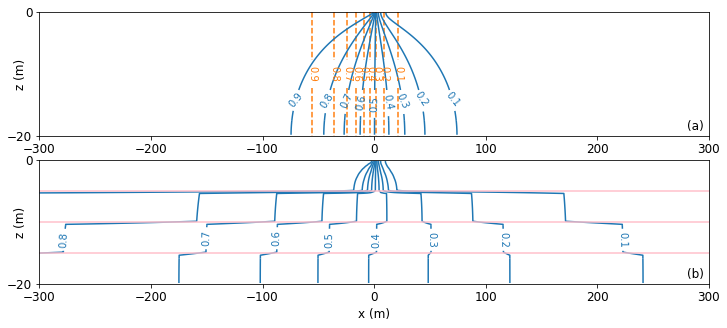

In [6]:
# figure amplitude
plt.figure(figsize=(12, 5))
plt.subplot(211)
levels = np.arange(0.1, 1, 0.1)
x = np.linspace(-100, 100, 201)
a1d = ml1d.amp(x)
a1d = np.vstack((a1d, a1d, a1d))
z1d = [0, -0.5 * H, -H]
cs = plt.contour(x, z1d, a1d, levels=levels, colors='C1', linestyles='--')
plt.clabel(cs, fmt='%1.1f')
amaq = mlmaq.amp(x)
# break up contours so that labels are in bottom part
plt.contour(x, zmaq0[:51], amaq[:51], levels=levels, colors='C0')
cs = plt.contour(x, zmaq0[50:71], amaq[50:71], levels=levels, colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.contour(x, zmaq0[70:], amaq[70:], levels=levels, colors='C0')
#
plt.yticks([-20, 0], fontsize=12)
plt.xticks(np.arange(-300, 301, 100), fontsize=12)
plt.xlim(-300, 300)
plt.ylabel('z (m)', labelpad=-20, fontsize=12)
plt.xlabel('x (m)', fontsize=12)
plt.text(280, -19, '(a)', fontsize=12)

plt.subplot(212)
levels = np.arange(0.1, 1, 0.1)
x = np.linspace(-300, 300, 201)
zmaq1 = np.arange(-0.125, -5, -0.25)
zmaq2 = np.arange(-5.125 - 0.25, -10, -0.25)
zmaq3 = np.arange(-10.125 - 0.25, -15, -0.25)
zmaq4 = np.arange(-15.125 - 0.25, -20, -0.25)
zmaq = np.hstack((zmaq1, zmaq2, zmaq3, zmaq4))
amaq = mlmaq2.amp(x)
plt.contour(x, zmaq[:41], amaq[:41], levels=levels, colors='C0')
cs = plt.contour(x, zmaq[40:61], amaq[40:61], levels=levels, colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.contour(x, zmaq[60:], amaq[60:], levels=levels, colors='C0')
plt.plot([-300, 300], [-5, -5], color='pink')
plt.plot([-300, 300], [-10, -10], color='pink')
plt.plot([-300, 300], [-15, -15], color='pink')
plt.yticks([-20, 0], fontsize=12)
plt.xticks(np.arange(-300, 301, 100), fontsize=12)
plt.xlim(-300, 300)
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('z (m)', labelpad=-20, fontsize=12)
plt.text(280, -19, '(b)', fontsize=12);
#plt.savefig('maqtides_ex2.eps', bbox_inches='tight')

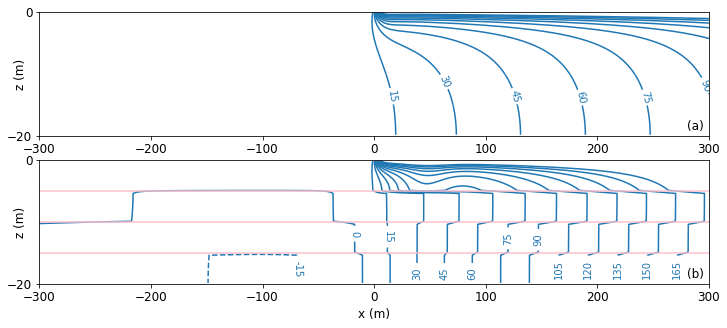

In [7]:
# figure
plt.figure(figsize=(12, 5))
plt.subplot(211)
levels = np.arange(-15, 180, 15)
x = np.linspace(-300, 300, 201)
fmaq = mlmaq.phase(x) * 24 * 60
plt.contour(x, zmaq0[:41], fmaq[:41], levels=levels, colors='C0')
cs = plt.contour(x, zmaq0[40:61], fmaq[40:61], levels=levels, colors='C0')
plt.clabel(cs, fmt='%1.0f')
plt.contour(x, zmaq0[60:], fmaq[60:], levels=levels, colors='C0')
plt.yticks([-20, 0], fontsize=12)
plt.xticks(np.arange(-300, 301, 100), fontsize=12)
plt.xlim(-300, 300)
plt.ylabel('z (m)', labelpad=-20, fontsize=12)
plt.xlabel('x (m)', fontsize=12)
plt.text(280, -19, '(a)', fontsize=12)
#
plt.subplot(212)
fmaq = mlmaq2.phase(x) * 24 * 60
levels = np.arange(-15, 180, 15)
x = np.linspace(-300, 300, 201)
zmaq1 = np.arange(-0.125, -5, -0.25)
zmaq2 = np.arange(-5.125 - 0.25, -10, -0.25)
zmaq3 = np.arange(-10.125 - 0.25, -15, -0.25)
zmaq4 = np.arange(-15.125 - 0.25, -20, -0.25)
zmaq = np.hstack((zmaq1, zmaq2, zmaq3, zmaq4))
amaq = mlmaq2.amp(x)
plt.contour(x, zmaq[:41], fmaq[:41], levels=levels, colors='C0')
cs = plt.contour(x, zmaq[40:], fmaq[40:], levels=levels, colors='C0')
plt.clabel(cs, fmt='%1.0f')
plt.plot([-300, 300], [-5, -5], color='pink')
plt.plot([-300, 300], [-10, -10], color='pink')
plt.plot([-300, 300], [-15, -15], color='pink')
plt.yticks([-20, 0], fontsize=12)
plt.xticks(np.arange(-300, 301, 100), fontsize=12)
plt.xlim(-300, 300)
plt.xlabel('x (m)', fontsize=12)
plt.ylabel('z (m)', labelpad=-20, fontsize=12)
plt.text(280, -19, '(b)', fontsize=12);
#plt.savefig('maqtides_ex2b.eps', bbox_inches='tight')